<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#KNN-Model" data-toc-modified-id="KNN-Model-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>KNN Model</a></span></li><li><span><a href="#XGBoost-Model" data-toc-modified-id="XGBoost-Model-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>XGBoost Model</a></span></li><li><span><a href="#XGBoost-Random-Forest-Classifier" data-toc-modified-id="XGBoost-Random-Forest-Classifier-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>XGBoost Random Forest Classifier</a></span></li><li><span><a href="#XGBoost-Feature-Selection" data-toc-modified-id="XGBoost-Feature-Selection-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>XGBoost Feature Selection</a></span></li><li><span><a href="#Model-Evaluation-with-ROC-AUC" data-toc-modified-id="Model-Evaluation-with-ROC-AUC-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Model Evaluation with ROC AUC</a></span></li><li><span><a href="#Random-Forest-Classifier" data-toc-modified-id="Random-Forest-Classifier-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Random Forest Classifier</a></span></li><li><span><a href="#Gradient-Boosting-Classifier" data-toc-modified-id="Gradient-Boosting-Classifier-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Gradient Boosting Classifier</a></span><ul class="toc-item"><li><span><a href="#Gradient-Boosting-Classifier-using-PCA" data-toc-modified-id="Gradient-Boosting-Classifier-using-PCA-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Gradient Boosting Classifier using PCA</a></span></li></ul></li><li><span><a href="#Support-Vector-Machine" data-toc-modified-id="Support-Vector-Machine-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Support Vector Machine</a></span></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time

%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)
sns.set(style = "whitegrid")
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

import random
import statsmodels.api as sm
import sklearn.model_selection as ms
from xgboost import XGBClassifier, XGBRFClassifier
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNet
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score, StratifiedKFold
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler,LabelEncoder
from sklearn import neighbors
from sklearn.metrics import mean_squared_log_error, mean_squared_error, confusion_matrix, roc_auc_score, f1_score, plot_roc_curve, roc_auc_score, roc_curve, RocCurveDisplay, auc
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn import svm
#from PlotFunctions import plot_model
from mpl_toolkits.mplot3d import Axes3D

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
size=15
params = {'legend.fontsize': 'large',
          'figure.figsize': (20,8),
          'axes.labelsize': size*1.1,
          'axes.titlesize': size*2,
          'xtick.labelsize': size*1.1,
          'ytick.labelsize': size*1.1,
          'axes.titlepad': 25,
          'figure.titlesize': size*2,
          'legend.fontsize': size,
            'legend.title_fontsize': size*1.1
         }

plt.rcParams.update(params)

sns.set_style("whitegrid")

In [68]:
# load binaries
# trIeng_df_dum = pd.read_pickle("./data/trIeng_df_dum.pkl")
# trIeng_df_undum = pd.read_pickle("./data/trIeng_df_undum.pkl")
trIeng_df=pd.read_pickle("../data/trIeng_df.pkl")

In [69]:
#assign predictor and target variables

y= trIeng_df['PotentialFraud']
X= trIeng_df.drop('PotentialFraud', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

In [70]:
X.isnull().sum()

numBene                                 0
numClaim                                0
InscClaimAmtReimbursed_sum              0
County                                  0
fraction_died                           0
MFgender_ratio                          0
fraction_not_white                      0
InscClaimAmtReimbursed_mean             0
InscClaimAmtReimbursed_mad              0
ReimbPerDayAdmit_mean                   0
ReimbPerDayAdmit_mad                    0
ClaimStartDt_mean                       0
ClaimStartDt_mad                        0
AdmissionDt_mean                        0
AdmissionDt_mad                         0
RenalDiseaseIndicator_mean              0
NoOfMonths_PartACov_mean                0
NoOfMonths_PartBCov_mean                0
ChronicCond_Alzheimer_mean              0
ChronicCond_Heartfailure_mean           0
ChronicCond_KidneyDisease_mean          0
ChronicCond_Cancer_mean                 0
ChronicCond_ObstrPulmonary_mean         0
ChronicCond_Depression_mean       

In [71]:
# scale data

scaler = StandardScaler()
Xscl= scaler.fit_transform(X)

Xscl_train, Xscl_test, yscl_train, yscl_test = train_test_split(Xscl, y, test_size = 0.2, random_state = 0, stratify = y)

In [48]:
Xscl_train.shape

(1673, 51)

#  KNN Model

In [72]:
# knn of train split only

knn = neighbors.KNeighborsClassifier()
## set the possible parameters from 3 to 30

# grid_param = {'n_neighbors': range(3, 31), 'metric': ['manhattan', 'minkowski', 'euclidean']}
# para_search = GridSearchCV(estimator=knn, param_grid=grid_param, scoring='accuracy', cv=5, return_train_score=True)
# para_search = para_search.fit(X, y.astype('int')) # y target must be integer type

knn.fit(Xscl_train, yscl_train)
print('Train Accuracy score: %.3f'%(knn.score(Xscl_train, yscl_train)))
print('Test Accuracy score: %.3f'%(knn.score(Xscl_test, yscl_test)))

Train Accuracy score: 0.869
Test Accuracy score: 0.831


In [22]:
strat= ms.StratifiedKFold(n_splits=5)
scores = ms.cross_val_score(estimator=knn, X=Xscl_train, y=yscl_train, cv=5)
scores

array([0.81492537, 0.8119403 , 0.8119403 , 0.81437126, 0.84131737])

In [23]:
# Test error vs. number of folds

mean_error = [] 
std_error = [] 
kfold = range(3, 50) 

for i in kfold:
    scores = ms.cross_val_score(knn, Xscl_train, yscl_train, cv=i) 
    mean_error.append(1 - scores.mean()) 
    std_error.append(scores.std())

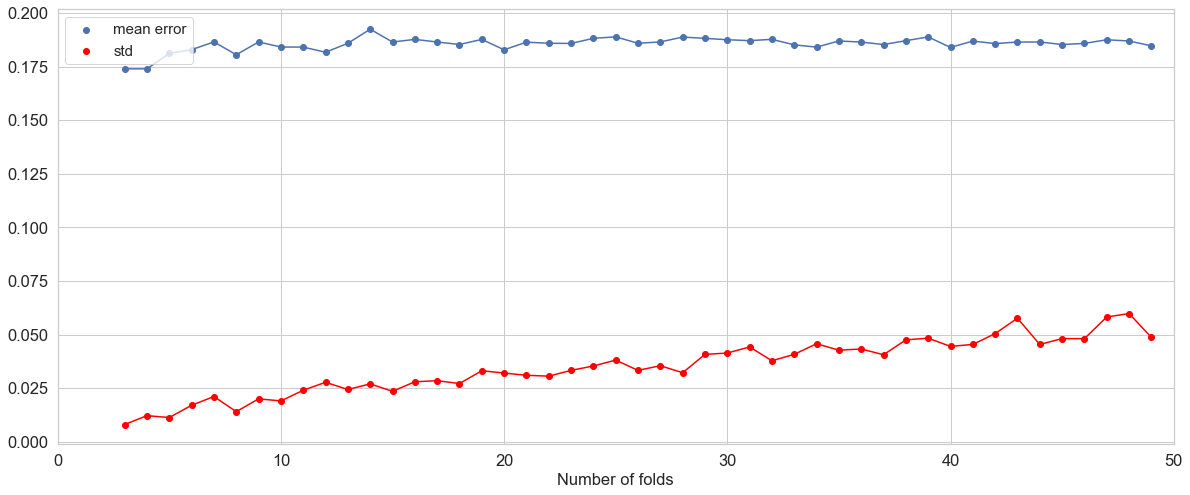

In [24]:
s1 = plt.scatter(kfold, mean_error, label='mean error') 
plt.plot(kfold, mean_error)
s2 = plt.scatter(kfold, std_error, color='red', label='std') 
plt.plot(kfold, std_error, color='red')
plt.xlim(0, 50)
plt.xlabel('Number of folds')
plt.legend(handles=[s1, s2], loc=2)
plt.show()

In [25]:
len(yscl_test)

419

In [26]:
len(yscl_test[yscl_test==1])
# 88 fraud / 419 providers

88

In [77]:
419-88

331

In [73]:
confusion_matrix(yscl_train, knn.predict(Xscl_train))

array([[1249,   72],
       [ 147,  205]])

In [74]:
confusion_matrix(yscl_test, knn.predict(Xscl_test))

array([[309,  22],
       [ 49,  39]])

# XGBoost Model

In [86]:
xgbc = XGBClassifier()
xgbc.fit(X_train, y_train)
print('Train Accuracy score: %.3f'%(xgbc.score(X_train, y_train)))
print('Test Accuracy score: %.3f'%(xgbc.score(X_test, y_test)))

Train Accuracy score: 1.000
Test Accuracy score: 0.866


In [24]:
#Baseline train test Values
train_baseline_xgb = xgbc.predict(Xalt_le_train)
#RMSE_train = np.sqrt(mean_squared_error(yalt_le_train, train_baseline_xgb))

test_baseline_xgb = xgbc.predict(Xalt_le_test)
#RMSE_test = np.sqrt(mean_squared_error(yalt_le_test,test_baseline_xgb))

print("Baseline Values: ")
print("Accuracy for train data is: %.3f" %(xgbc.score(Xalt_le_train, yalt_le_train)))
print("Accuracy for test data is: %.3f" %(xgbc.score(Xalt_le_test,yalt_le_test)))
print("-" * 50)
#print("RMSE for train data is: %.3f" % RMSE_train)
#print("RMSE for test data is: %.3f" % RMSE_test)

Baseline Values: 
Accuracy for train data is: 1.000
Accuracy for test data is: 0.864
--------------------------------------------------


In [76]:
strat= XGBClassifier(n_splits=5, random_state=0)
scores = ms.cross_val_score(estimator=xgbc, X=X_train, y=y_train, cv=5)
scores

array([0.84477612, 0.84179104, 0.87164179, 0.84131737, 0.84131737])

In [77]:
confusion_matrix(y_train, xgbc.predict(X_train))

array([[1321,    0],
       [   0,  352]])

In [78]:
confusion_matrix(y_test, xgbc.predict(X_test))

array([[314,  17],
       [ 39,  49]])

# XGBoost Random Forest Classifier

In [80]:
xgbrfc = XGBRFClassifier()
xgbrfc.fit(X_train, y_train)
print(xgbrfc.score(X_train, y_train))
print(xgbrfc.score(X_test, y_test))

print('Train Accuracy score: %.3f'%(xgbrfc.score(X_train, y_train)))
print('Test Accuracy score: %.3f'%(xgbrfc.score(X_test, y_test)))

0.958756724447101
0.863961813842482
Train Accuracy score: 0.959
Test Accuracy score: 0.864


In [81]:
confusion_matrix(y_test, xgbrfc.predict(X_test))

array([[315,  16],
       [ 41,  47]])

# XGBoost Feature Selection

In [87]:
fi=list(zip(X_train.columns, xgbc.feature_importances_))
fi.sort(key=lambda t: t[1])
print(fi)
firem = [i for i in fi if i[1] > 0.01]
# get column names only
colnam=[t[0] for t in  firem]

[('AdmissionDt_mad', 0.0), ('AdmissionDt_mean', 0.0015886549), ('numDiagCodes_mad', 0.006385402), ('numProcCodes_mad', 0.0067581194), ('ChronicCond_rheumatoidarthritis_mean', 0.0071024136), ('ChronicCond_Cancer_mean', 0.008120619), ('ChronicCond_ObstrPulmonary_mean', 0.008524991), ('RenalDiseaseIndicator_mean', 0.009749524), ('ChronicCond_Depression_mean', 0.009840397), ('fraction_not_white', 0.009852037), ('ChronicCond_stroke_mean', 0.009904166), ('numDiagCodes_mean', 0.0100905895), ('IPAnnualReimbursementAmt_mean', 0.010249668), ('ClaimStartDt_mean', 0.010352005), ('ChronicCond_Osteoporasis_mean', 0.0104988795), ('IPAnnualDeductibleAmt_mean', 0.010554284), ('Age_mean', 0.01070142), ('numPhysicians_mad', 0.01096059), ('ChronicCond_IschemicHeart_mean', 0.011004374), ('numPhysicians_mean', 0.011231513), ('ChronicCond_Alzheimer_mean', 0.011702934), ('numChronic_mad', 0.011812969), ('MFgender_ratio', 0.011848441), ('numProcCodes_mean', 0.011895049), ('ChronicCond_Heartfailure_mean', 0.012

In [88]:
colnam

['numDiagCodes_mean',
 'IPAnnualReimbursementAmt_mean',
 'ClaimStartDt_mean',
 'ChronicCond_Osteoporasis_mean',
 'IPAnnualDeductibleAmt_mean',
 'Age_mean',
 'numPhysicians_mad',
 'ChronicCond_IschemicHeart_mean',
 'numPhysicians_mean',
 'ChronicCond_Alzheimer_mean',
 'numChronic_mad',
 'MFgender_ratio',
 'numProcCodes_mean',
 'ChronicCond_Heartfailure_mean',
 'IPAnnualReimbursementAmt_mad',
 'ChronicCond_KidneyDisease_mean',
 'IPAnnualDeductibleAmt_mad',
 'Age_mad',
 'InscClaimAmtReimbursed_mean',
 'ClaimDuration_mean',
 'numChronic_mean',
 'AdmitDays_mean',
 'InscClaimAmtReimbursed_mad',
 'County',
 'ChronicCond_Diabetes_mean',
 'ClmAdmitDiagnosisCode_uniq',
 'NoOfMonths_PartBCov_mean',
 'fraction_died',
 'numBene',
 'ClmDiagnosisCodes_uniq',
 'ReimbPerDayAdmit_mad',
 'ClaimStartDt_mad',
 'ClaimDuration_mad',
 'ReimbPerDayAdmit_mean',
 'NoOfMonths_PartACov_mean',
 'DiagnosisGroupCode_uniq',
 'ClmProcedureCodes_uniq',
 'numClaim',
 'AdmitDays_mad',
 'InscClaimAmtReimbursed_sum']

In [89]:
len(colnam)

40

In [90]:
# new dataframe with reduced features
X_train_red = X_train[colnam]
X_test_red = X_test[colnam]

In [91]:
xgbc_red = XGBClassifier()
xgbc_red.fit(X_train_red, y_train)
print(xgbc_red.score(X_train_red, y_train))
print(xgbc_red.score(X_test_red, y_test))

1.0
0.8758949880668258


In [92]:
confusion_matrix(y_test, xgbc_red.predict(X_test_red))

array([[313,  18],
       [ 34,  54]])

# Model Evaluation with ROC AUC

In [94]:
# ROC AUC for XGBoost classifier with reduced dataset after feature selection ():
print(roc_auc_score(y_train,xgbc_red.predict(X_train_red)))
print(roc_auc_score(y_test,xgbc_red.predict(X_test_red)))

1.0
0.7796278494918979


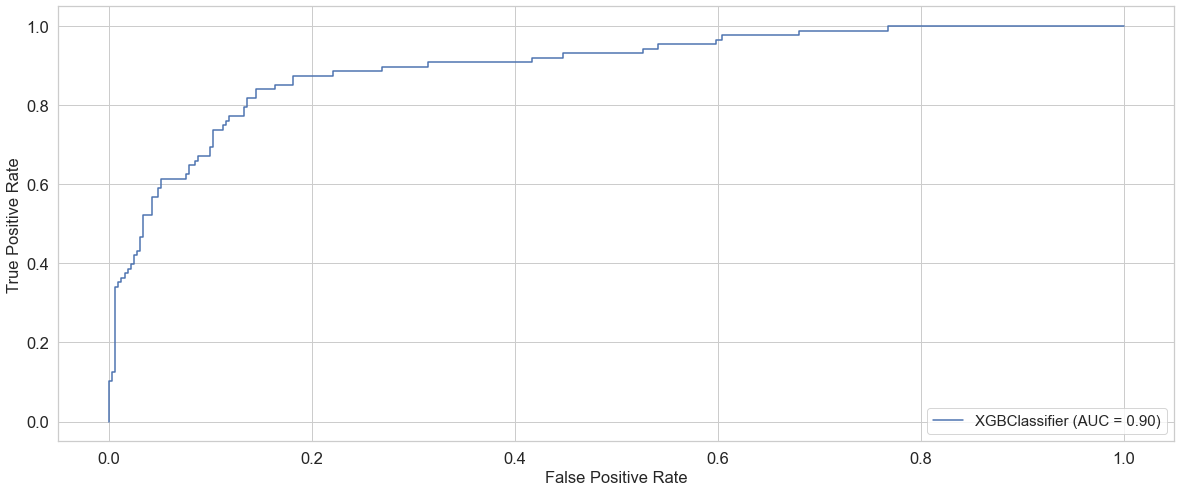

In [95]:
plot_roc_curve(xgbc_red, X_test_red,y_test)

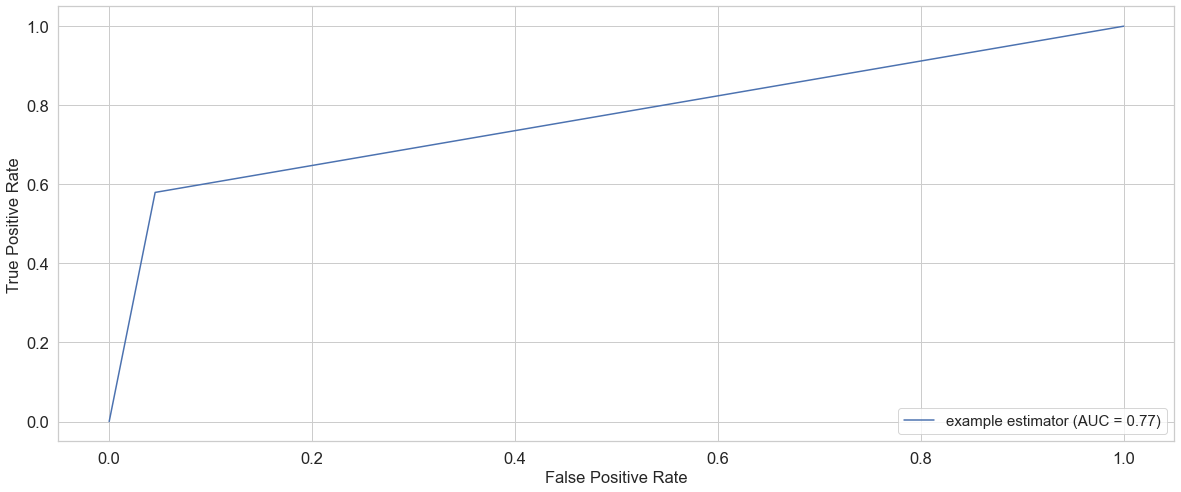

In [59]:
fpr, tpr, thresholds = roc_curve(yalt_le_test, xgbc_red.predict(Xalt_le_test_red))
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='example estimator')
display.plot()  
plt.show()

In [60]:
# F1 for XGBoost classifier with reduced dataset after feature selection (ranges from 0 to 1, perfect score is 1):
print(f1_score(yalt_le_train,xgbc_red.predict(Xalt_le_train_red)))
print(f1_score(yalt_le_test,xgbc_red.predict(Xalt_le_test_red)))

1.0
0.6623376623376623


# Random Forest Classifier

In [96]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
print(rfc.score(X_train, y_train))
print(rfc.score(X_test, y_test))

0.9994022713687986
0.8663484486873508


In [69]:
confusion_matrix(yalt_le_test, rfc.predict(Xalt_le_test))

array([[317,  14],
       [ 52,  36]])

# Gradient Boosting Classifier

In [97]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
print(gbc.score(X_train, y_train))
print(gbc.score(X_test, y_test))

0.9617453676031081
0.8711217183770883


In [98]:
confusion_matrix(y_test, gbc.predict(X_test))

array([[312,  19],
       [ 35,  53]])

In [83]:
# ROC AUC for GB classifier :
print(roc_auc_score(yalt_le_train,gbc.predict(Xalt_le_train)))
print(roc_auc_score(yalt_le_test,gbc.predict(Xalt_le_test)))

0.916384582960567
0.7898413897280967


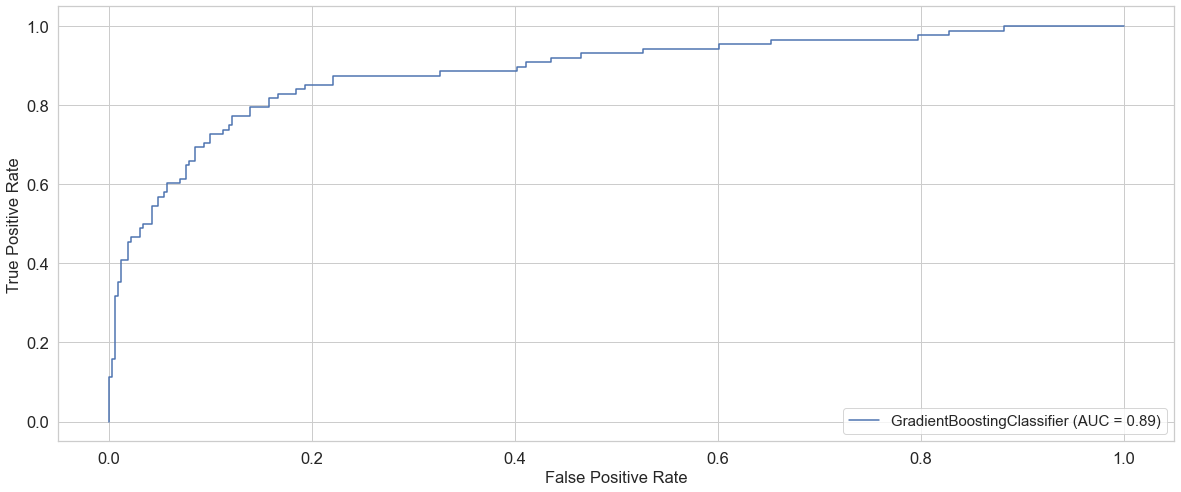

In [99]:
plot_roc_curve(gbc, X_test,y_test)

In [100]:
# with reduced dataset
gbc = GradientBoostingClassifier()
gbc.fit(X_train_red, y_train)
print(gbc.score(X_train_red, y_train))
print(gbc.score(X_test_red, y_test))

0.9623430962343096
0.8568019093078759


In [101]:
confusion_matrix(y_test, gbc.predict(X_test_red))

array([[307,  24],
       [ 36,  52]])

## Gradient Boosting Classifier using PCA 

In [29]:
pca_3 = PCA(n_components=50)
pca_result_3 = pca_3.fit_transform(Xalt_le)
print('Explained variation per principal component: {}'.format(pca_3.explained_variance_ratio_))

Explained variation per principal component: [0.15792236 0.06386414 0.05812938 0.04028418 0.02690936 0.02529868
 0.02441725 0.02414713 0.02167647 0.01974858 0.01836625 0.01811127
 0.01729694 0.01662362 0.01612472 0.0155087  0.01512323 0.01453097
 0.01369036 0.01355677 0.01330772 0.01293693 0.01276076 0.01261808
 0.01196139 0.01165054 0.01153041 0.01129727 0.01119847 0.01094575
 0.01082444 0.01074785 0.01046444 0.01040741 0.00998925 0.00978519
 0.00942855 0.00921615 0.00882939 0.00862806 0.00855963 0.00790366
 0.0076943  0.00760548 0.00744665 0.00698224 0.0066831  0.00623957
 0.00600379 0.00566926]


In [30]:
sum(pca_3.explained_variance_ratio_)

0.9106461149814871

In [ ]:
# gbc = GradientBoostingClassifier()
# gbc.fit(pca_result_3, yalt_le_train)
# print(gbc.score(pca_result_3, yalt_le_train))
# print(gbc.score(Xalt_le_test_red, yalt_le_test))

# Support Vector Machine

In [12]:
Xalt_le.dtypes

AttendingPhysician_mode                   int64
OperatingPhysician_mode                   int64
OtherPhysician_mode                       int64
ClmAdmitDiagnosisCode_mode                int64
DiagnosisGroupCode_mode                   int64
ClmDiagnosisCode_1_mode                   int64
ClmDiagnosisCode_2_mode                   int64
ClmDiagnosisCode_3_mode                   int64
ClmDiagnosisCode_4_mode                   int64
ClmDiagnosisCode_5_mode                   int64
ClmDiagnosisCode_6_mode                   int64
ClmDiagnosisCode_7_mode                   int64
ClmDiagnosisCode_8_mode                   int64
ClmDiagnosisCode_9_mode                   int64
ClmDiagnosisCode_10_mode                  int64
ClmProcedureCode_1_mode                   int64
ClmProcedureCode_2_mode                   int64
ClmProcedureCode_3_mode                   int64
ClmProcedureCode_4_mode                   int64
ClmProcedureCode_5_mode                   int64
numBene                                 

In [102]:

svm_model= svm.SVC(kernel='poly', C=1e5, degree=3, verbose=4, max_iter=-1)
svm_model.set_params(degree=3)
svm_model.fit(Xscl_train, yscl_train)
print(svm_model.score(Xscl_train, yscl_train))
print(svm_model.score(Xscl_test, yscl_test))


[LibSVM]1.0
0.766109785202864


In [103]:
confusion_matrix(yscl_test, svm_model.predict(Xscl_test))

array([[274,  57],
       [ 41,  47]])